In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import os

In [2]:
#Loading Traing data from train.csv file

train = pd.read_csv('train.csv')

In [3]:
#Checking the head of the dataframe

train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
#Checking the shape of the dataframe

train.shape

(595212, 59)

In [5]:
#Checking the dataframe information to get the sense of the data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

# MetaData DataFrame for Reference

In [6]:
#Creating Metadata DataFrame so that it will be easy to handle and manipulate data during data exploration steps

#role: input, ID, target
#level: nominal, interval, ordinal, binary
#keep: True or False
#dtype: int, float, str

MetaData = pd.DataFrame(columns=['variable','role', 'level', 'keep', 'dtype'])
data =[]
for columns in train.columns:
    
    #Defining Role
    
    if columns == 'id':
        role = 'id'
    elif columns == 'target':
        role = 'target'
    else:
        role = 'input'
        
    #Defining DataTypes
    
    dtype = train[columns].dtype
    
    #Defining keep
    
    keep = True
    
    #Defining Level
    
    if columns[-3:] == 'bin' or columns == 'target':
        level = 'binary'
    elif columns[-3:] == 'cat' or columns == 'id':
        level = 'categorical' 
    elif train[columns].dtype == float:
        level = 'interval'
    elif train[columns].dtype == int:
        level = 'ordinal'
        
        
    f_dict = {
        'variable' : columns,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    
    data.append(f_dict)

MetaData = MetaData.append(data)

print(MetaData)

          variable    role        level  keep    dtype
0               id      id  categorical  True    int64
1           target  target       binary  True    int64
2        ps_ind_01   input      ordinal  True    int64
3    ps_ind_02_cat   input  categorical  True    int64
4        ps_ind_03   input      ordinal  True    int64
5    ps_ind_04_cat   input  categorical  True    int64
6    ps_ind_05_cat   input  categorical  True    int64
7    ps_ind_06_bin   input       binary  True    int64
8    ps_ind_07_bin   input       binary  True    int64
9    ps_ind_08_bin   input       binary  True    int64
10   ps_ind_09_bin   input       binary  True    int64
11   ps_ind_10_bin   input       binary  True    int64
12   ps_ind_11_bin   input       binary  True    int64
13   ps_ind_12_bin   input       binary  True    int64
14   ps_ind_13_bin   input       binary  True    int64
15       ps_ind_14   input      ordinal  True    int64
16       ps_ind_15   input      ordinal  True    int64
17   ps_in

In [7]:
#Distribution of variables along the levels in MetaData dataframe

MetaData.groupby('level')[['variable']].count()

,variable
level,
binary,18
categorical,15
interval,10
ordinal,16


# Data Exploration

# Descriptive statistics

In [8]:
#Interval Variables

v = MetaData[(MetaData.level == 'interval') & (MetaData.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [9]:
#Ordinal Variables

v = MetaData[(MetaData.level == 'ordinal') & (MetaData.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [10]:
#Binary Variables

v = MetaData[(MetaData.level == 'binary') & (MetaData.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Missing Values

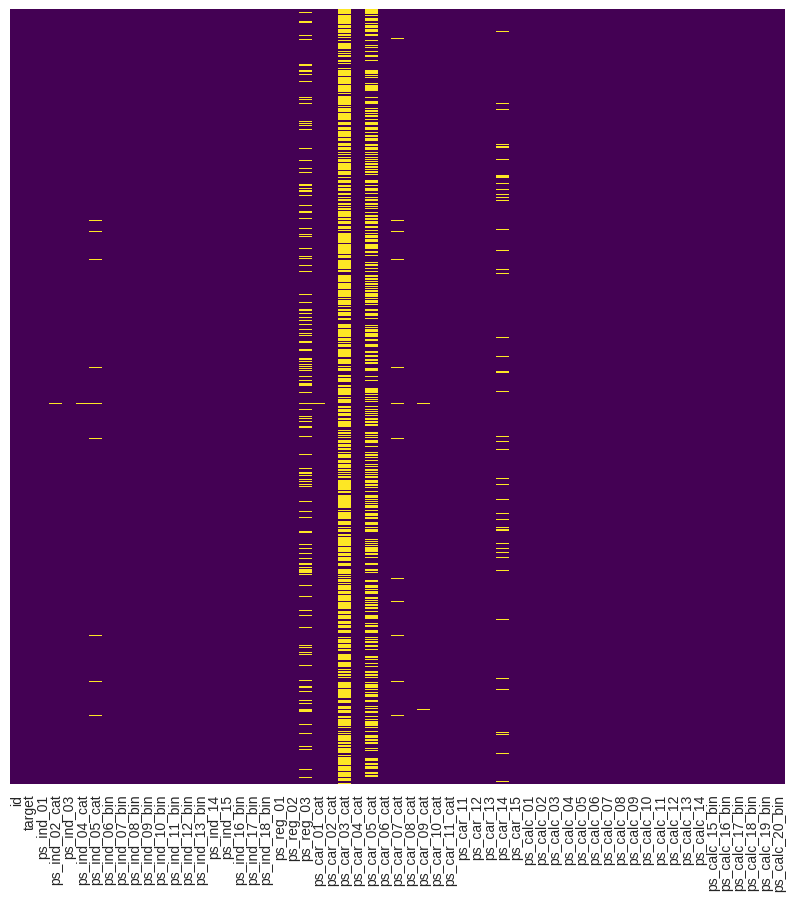

In [11]:
#Creating the heatmap for missing values using seaborn library

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train == -1, yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("MissingValueHeatMap.png", bbox_inches = "tight")

In [12]:
#Calculating the exact number and percentage of the missing values in all the variables

missing = []

for columns in train.columns:
    missing_count = train[train[columns] == -1][columns].count()
    if missing_count > 0:
        missing.append(columns)
        missings_perc = missing_count/train.shape[0]
        
        print('Variable %s has %i missing with %f percentage'%(columns, missing_count, missings_perc))
        
print('\nIn total, there are {} variables with missing values'.format(len(missing)))

Variable ps_ind_02_cat has 216 missing with 0.000000 percentage
Variable ps_ind_04_cat has 83 missing with 0.000000 percentage
Variable ps_ind_05_cat has 5809 missing with 0.000000 percentage
Variable ps_reg_03 has 107772 missing with 0.000000 percentage
Variable ps_car_01_cat has 107 missing with 0.000000 percentage
Variable ps_car_02_cat has 5 missing with 0.000000 percentage
Variable ps_car_03_cat has 411231 missing with 0.000000 percentage
Variable ps_car_05_cat has 266551 missing with 0.000000 percentage
Variable ps_car_07_cat has 11489 missing with 0.000000 percentage
Variable ps_car_09_cat has 569 missing with 0.000000 percentage
Variable ps_car_11 has 5 missing with 0.000000 percentage
Variable ps_car_12 has 1 missing with 0.000000 percentage
Variable ps_car_14 has 42620 missing with 0.000000 percentage

In total, there are 13 variables with missing values


In [13]:
#Finding:

#We can remove variable ps_car_03_cat, ps_car_05_cat as they have high percentage of missing values
#For other variables, we can do missing value treatment by substituting mean and mode.
#Missing values in Categorical variables can be replaced by the mode value in that variable 

In [14]:
#Updating the MetaData DataFrame for ps_car_03_cat and ps_car_05_cat (Keep = False)

In [15]:
#MetaData.loc[MetaData['variable'] == 'ps_car_03_cat', 'keep'] = False
#MetaData.loc[MetaData['variable'] == 'ps_car_05_cat', 'keep'] = False

# Correlation between Variables

In [16]:
#Creating list of variables based on the levels 

for variable in MetaData.variable:
    IntervalVar = MetaData[MetaData.level=='interval']['variable']
    CategoricalVar = MetaData[MetaData.level=='categorical']['variable']
    BinaryVar = MetaData[MetaData.level=='binary']['variable']
    OrdinalVar = MetaData[MetaData.level=='ordinal']['variable']


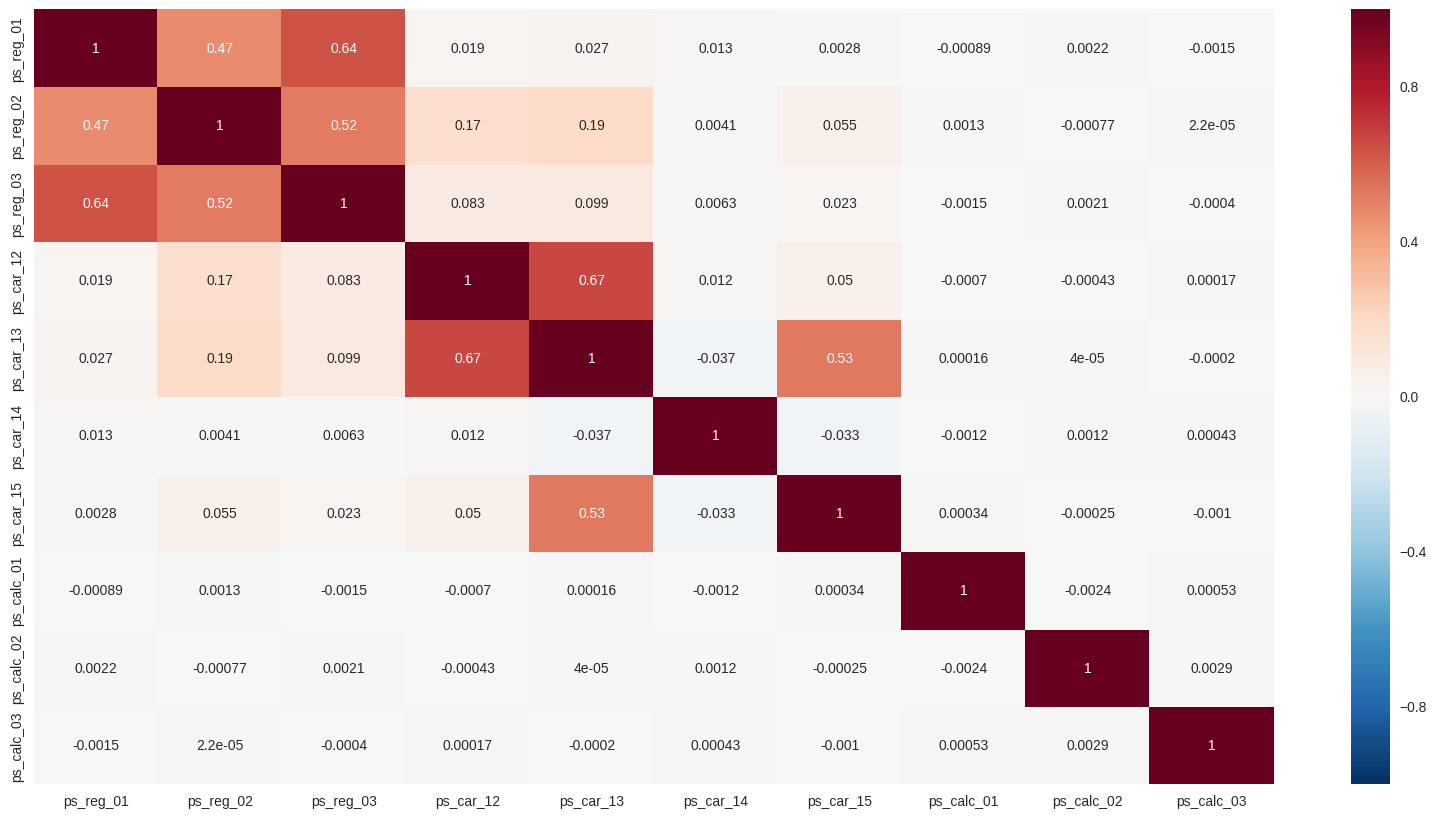

In [17]:
#Correlation Heatmap of the interval variables

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train[IntervalVar].corr(), annot=True)

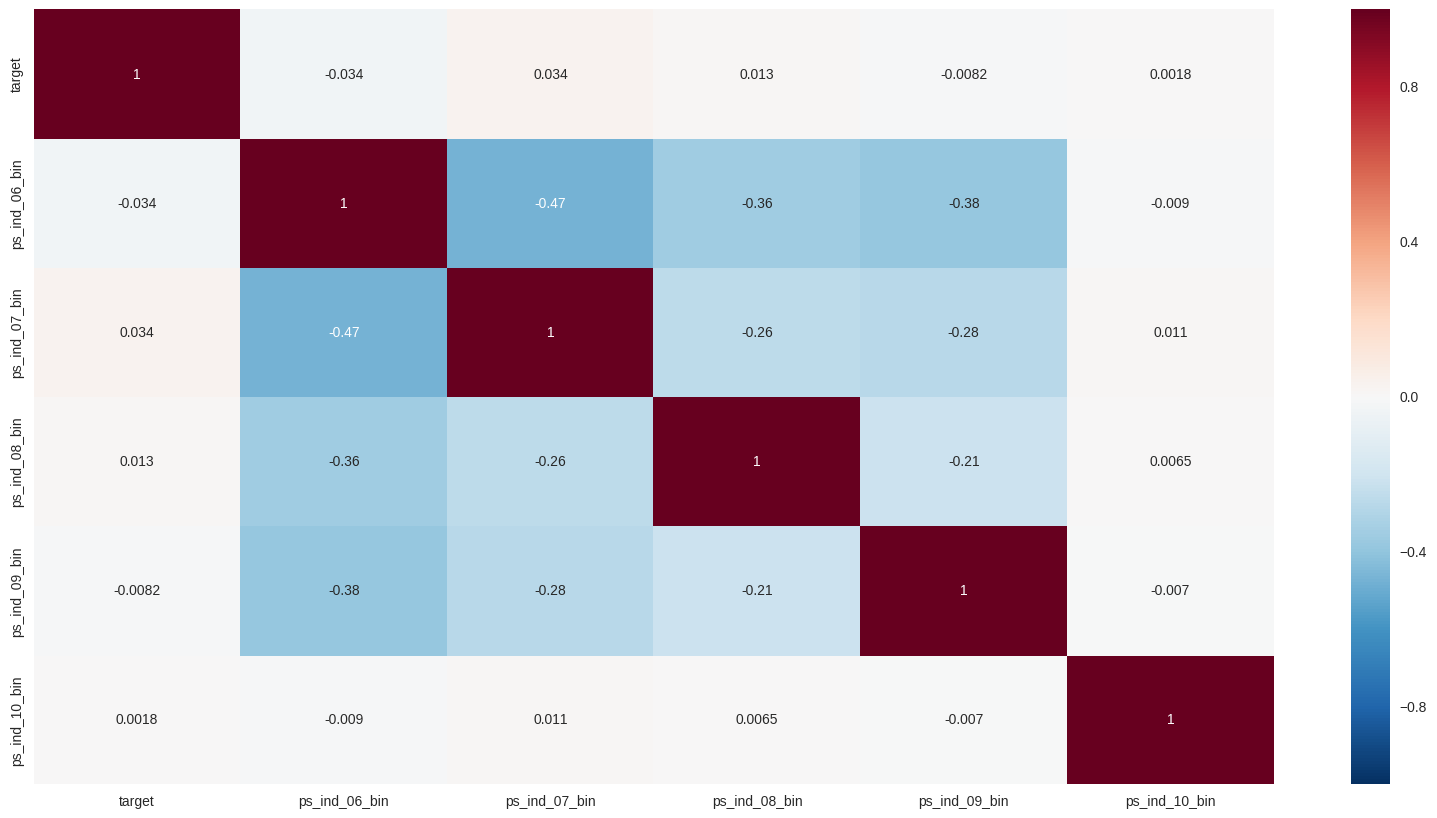

In [18]:
#Zoomed Correlation Heatmap of 'ind' variables  

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train.loc[:, ["target", "ps_ind_06_bin","ps_ind_07_bin", "ps_ind_08_bin", "ps_ind_09_bin","ps_ind_10_bin"] ].corr(), annot=True)

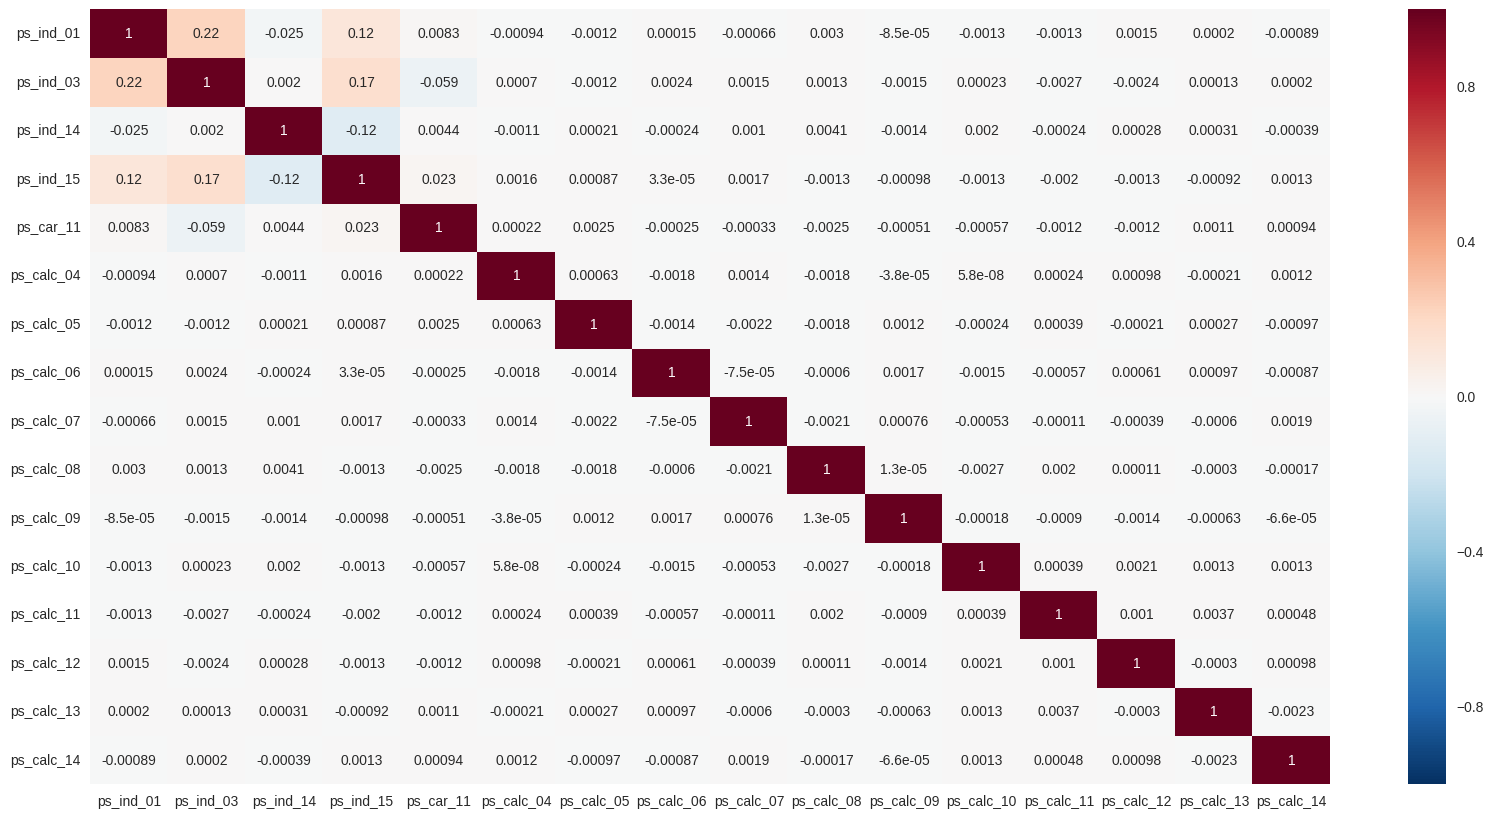

In [19]:
#Correlation Heatmap of Ordinal variables  

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train[OrdinalVar].corr(), annot=True)

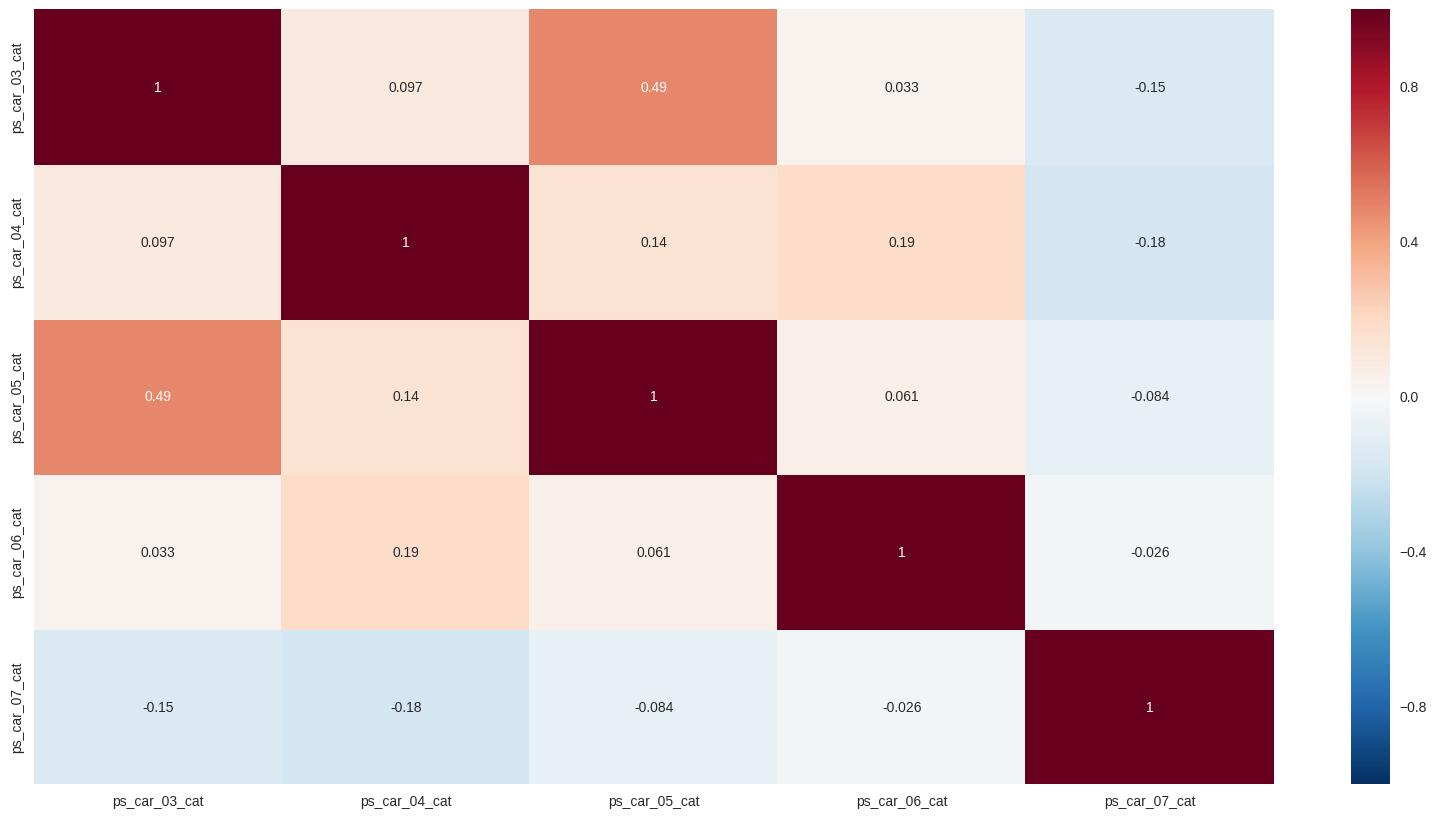

In [20]:
#Zoomed Heatmap of 'car' categorical variables

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train.loc[:, ["ps_car_03_cat","ps_car_04_cat","ps_car_05_cat","ps_car_06_cat","ps_car_07_cat"]].corr(), annot=True)

In [21]:
#Findings:

#Interval variables: we can see some of the variables are highly correlated like - ps_reg_01, ps_reg_02, ps_reg_03
#ps_ind_06_bin and ps_ind_07_bin are significantly correlated in 'ind' variables
#Very few ordinal variables are correlated to each other
#ps_car_03_cat and ps_cat_05_cat are significantly correlated in 'car' categorical variables

target
0    573518
1     21694
Name: target, dtype: int64

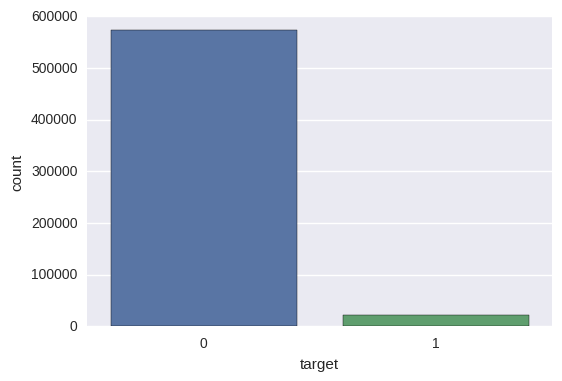

In [22]:
#Target variable distribution over the data

sns.countplot(train.target)
train.groupby('target')['target'].count()

In [23]:
#Finding:

#Data is highly imbalance with only ~3% of data belongs to minority class
#Need to do upscaling/downsampling of data to get the desired results

# Cardinality check for categorical variables

In [24]:
#Checking the cardinality of each categorical variable

v = MetaData[(MetaData.level == 'categorical') & (MetaData.keep)].index

for f in v:
    dist_values = train.iloc[:,f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable 0 has 595212 distinct values
Variable 3 has 5 distinct values
Variable 5 has 3 distinct values
Variable 6 has 8 distinct values
Variable 23 has 13 distinct values
Variable 24 has 3 distinct values
Variable 25 has 3 distinct values
Variable 26 has 10 distinct values
Variable 27 has 3 distinct values
Variable 28 has 18 distinct values
Variable 29 has 3 distinct values
Variable 30 has 2 distinct values
Variable 31 has 6 distinct values
Variable 32 has 3 distinct values
Variable 33 has 104 distinct values


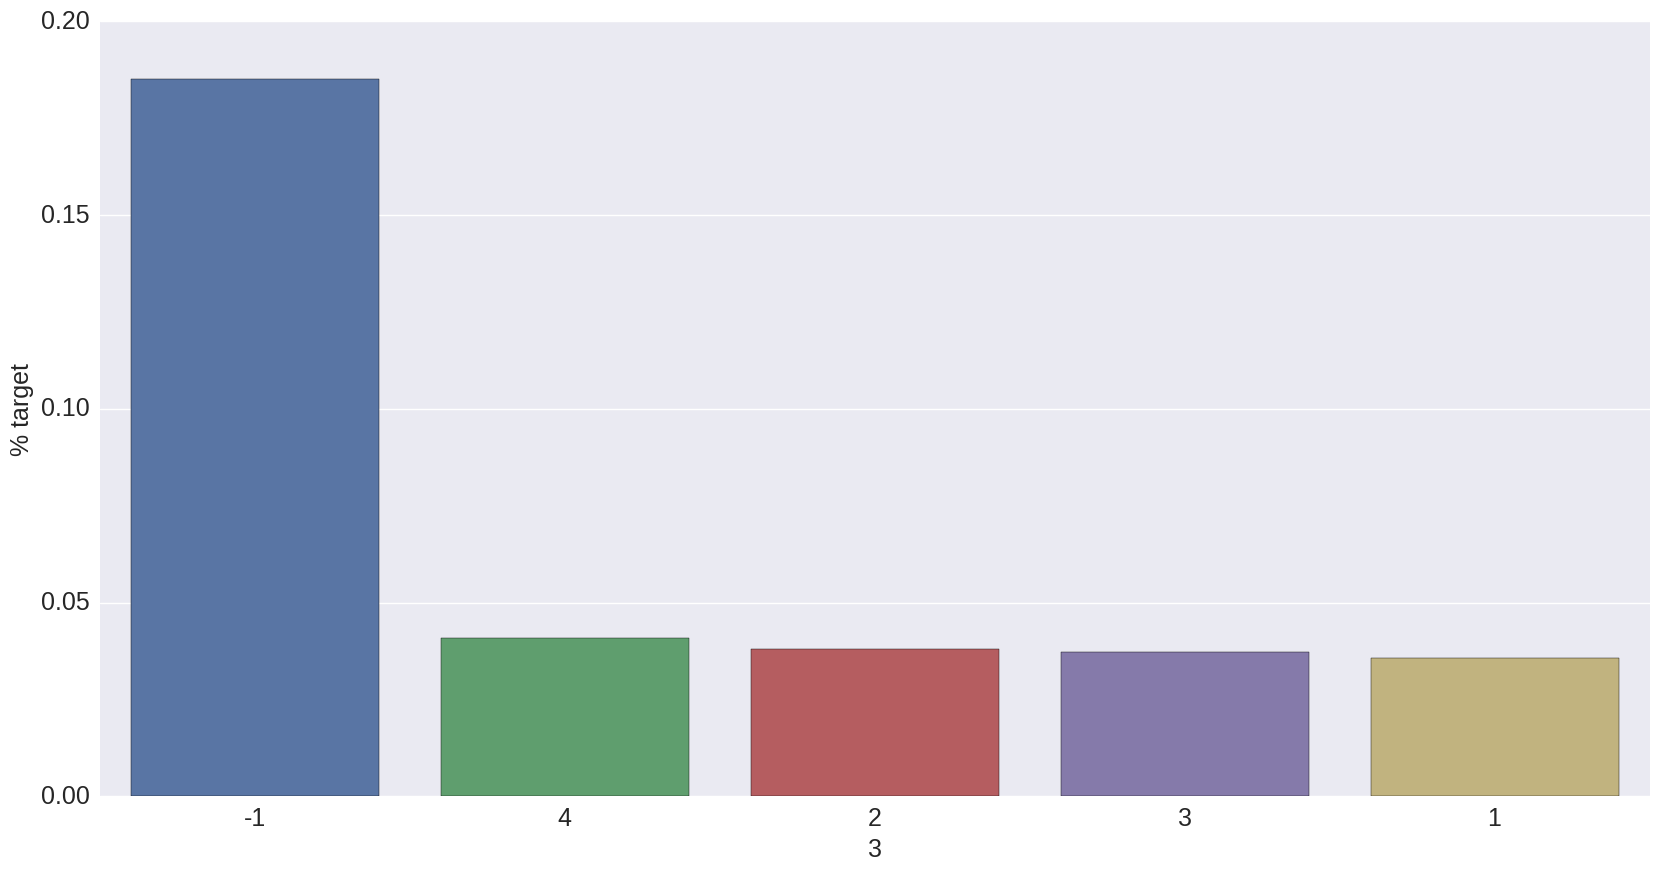

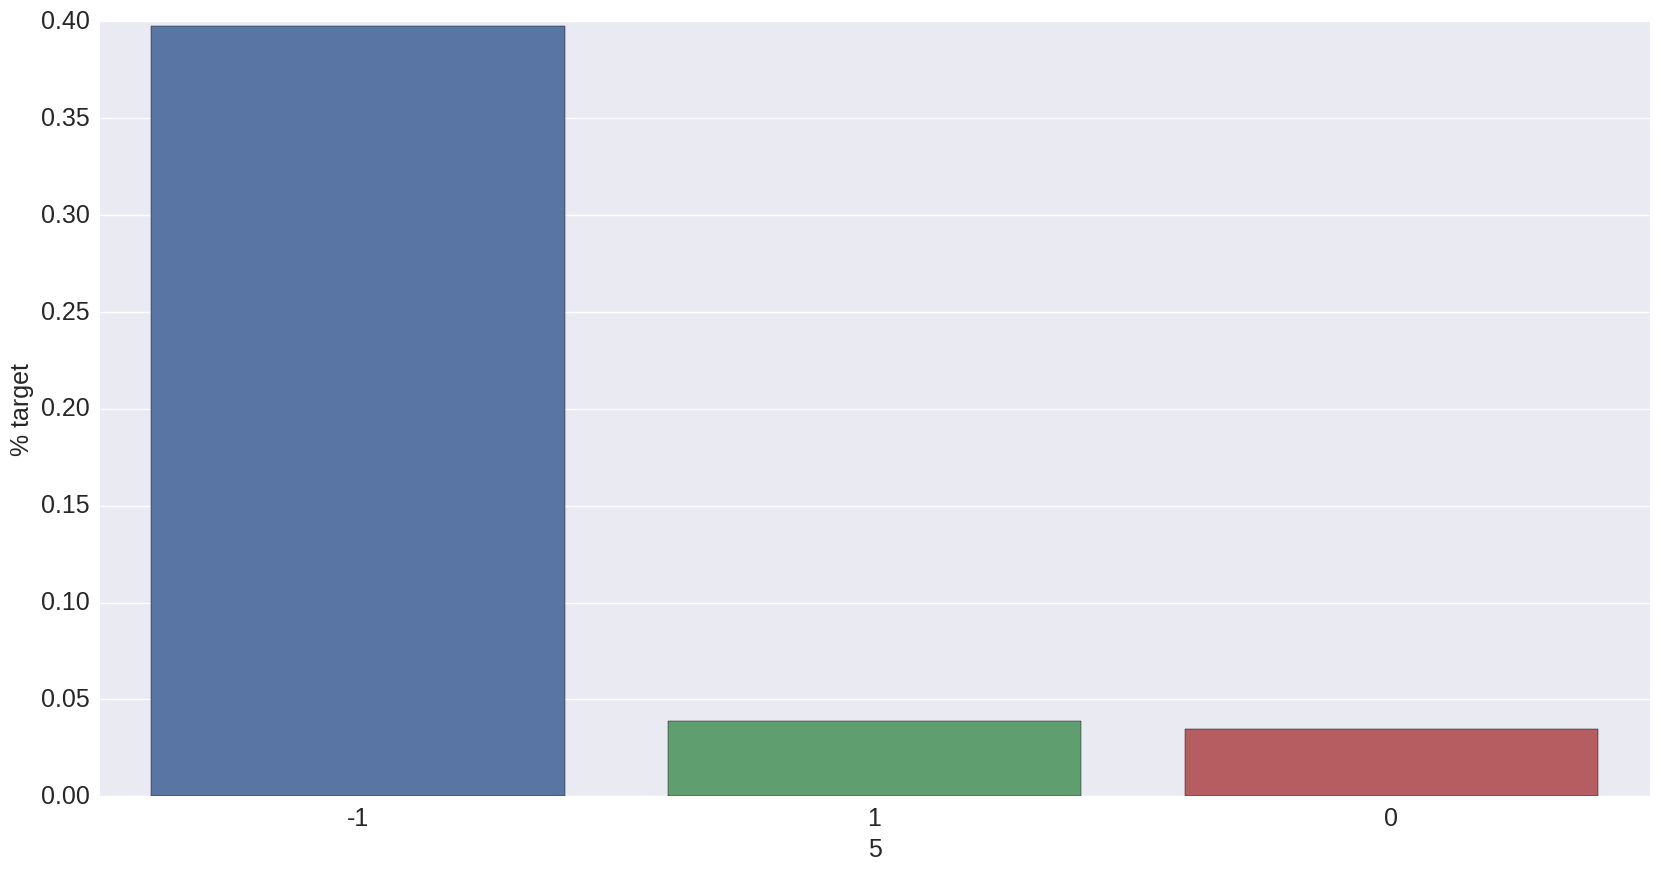

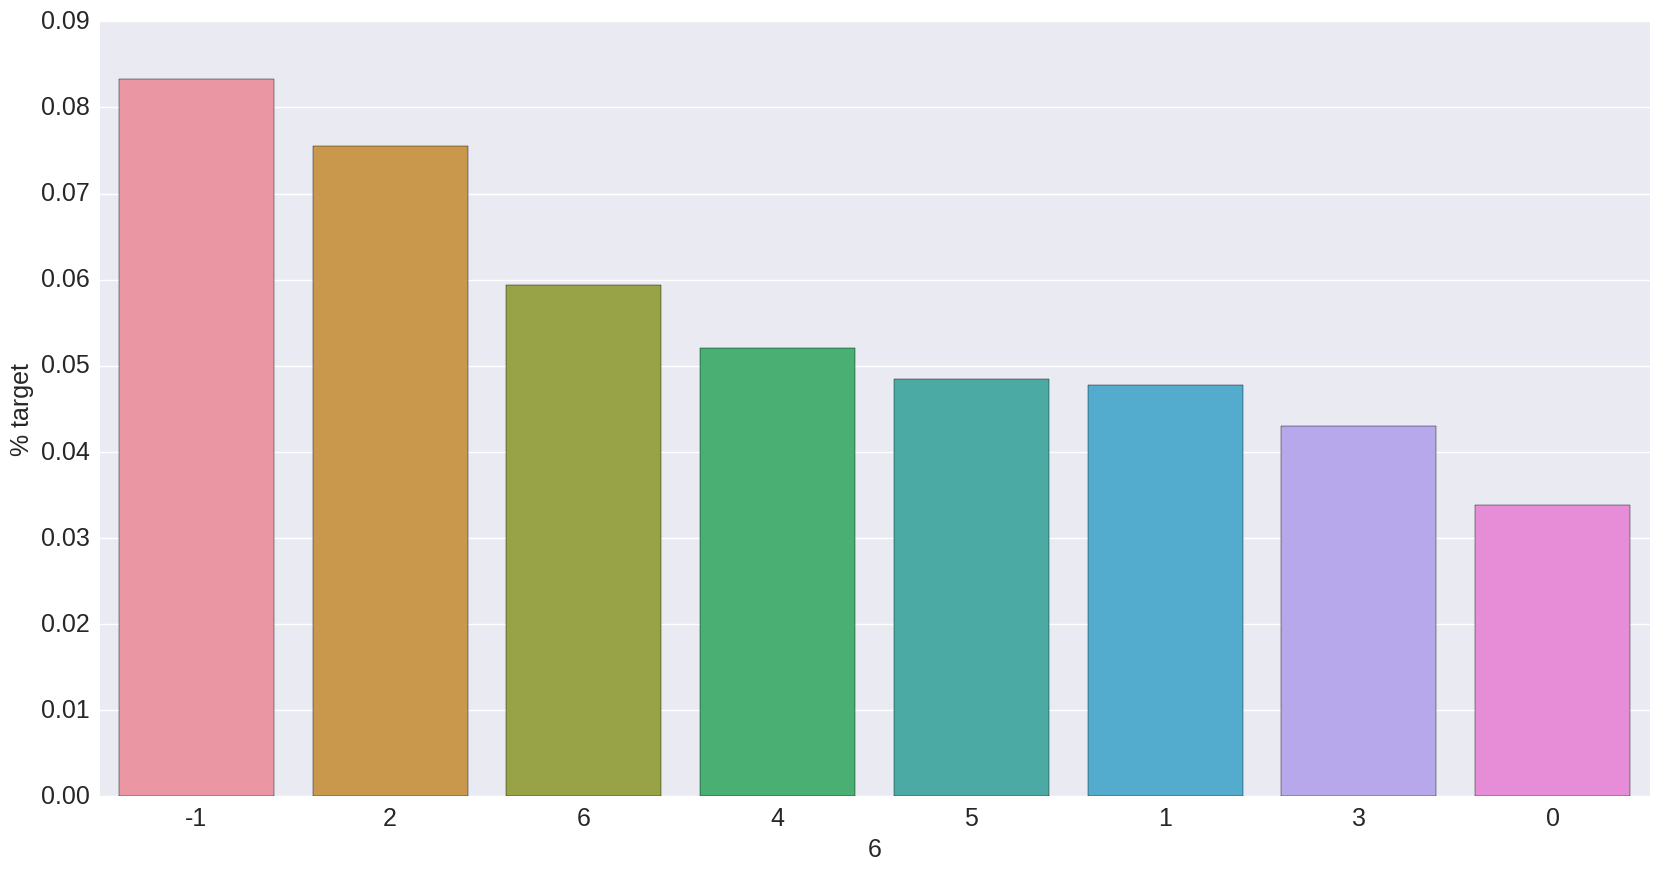

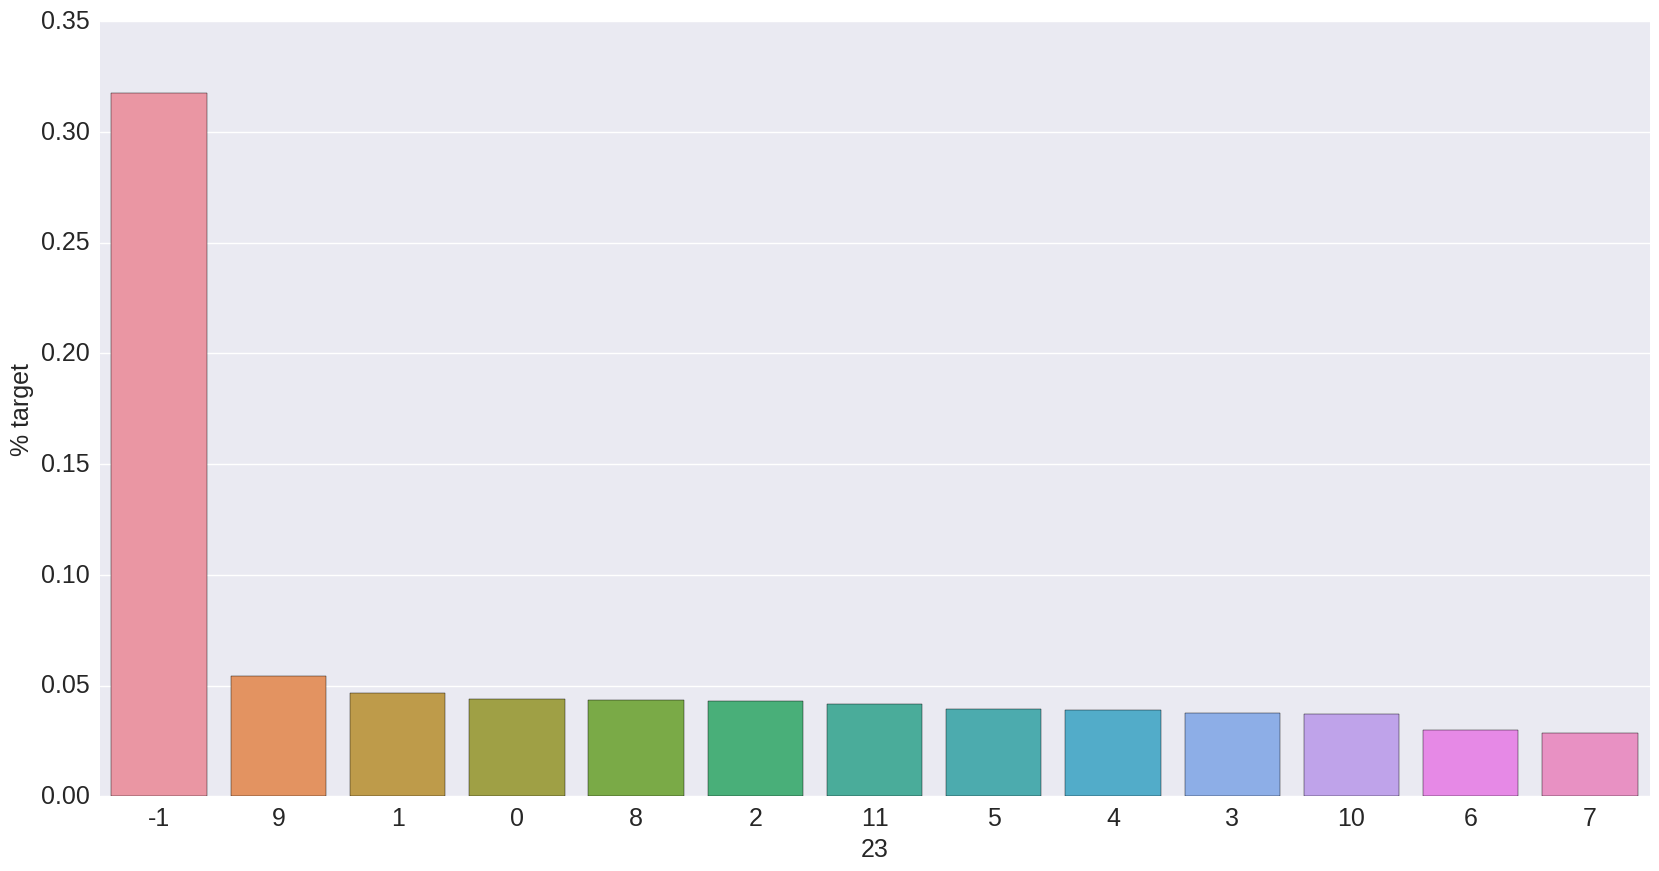

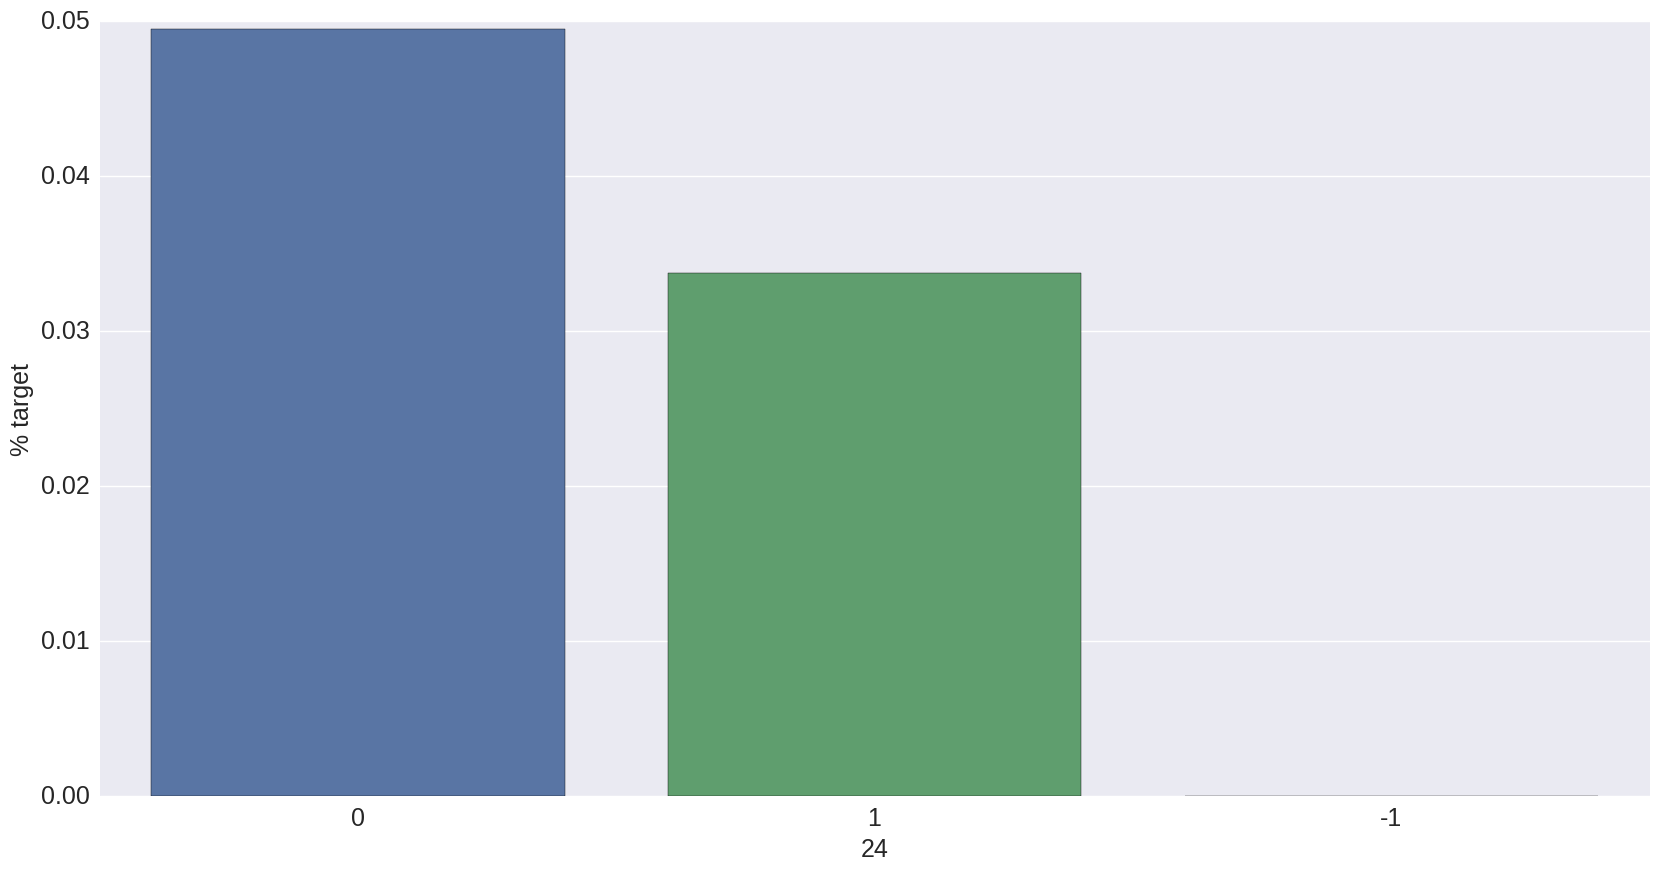

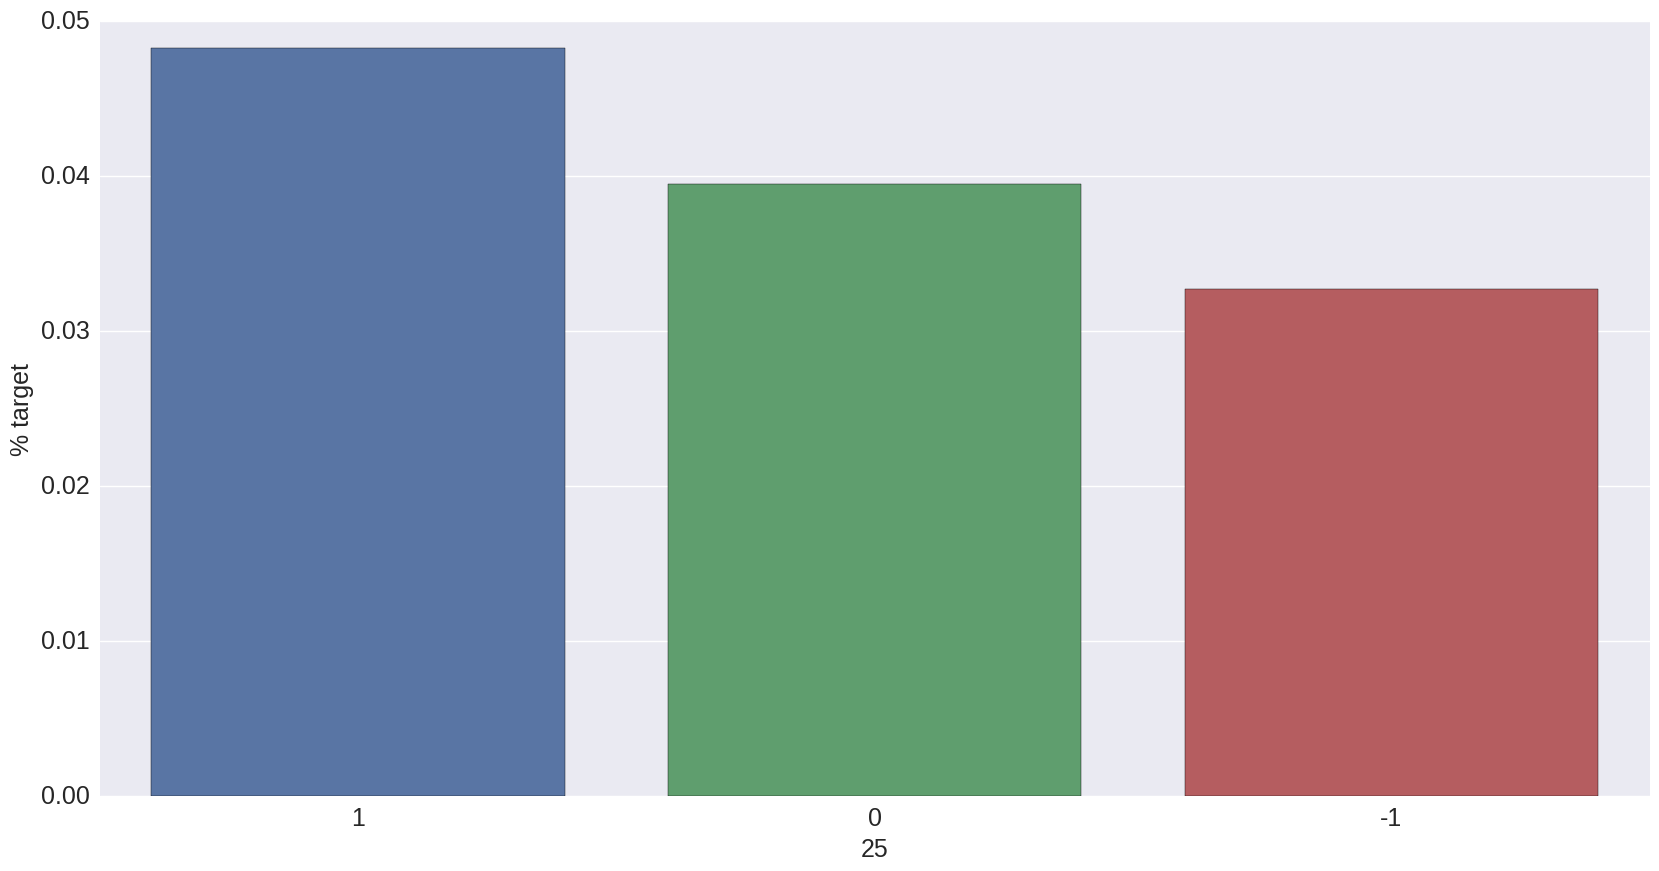

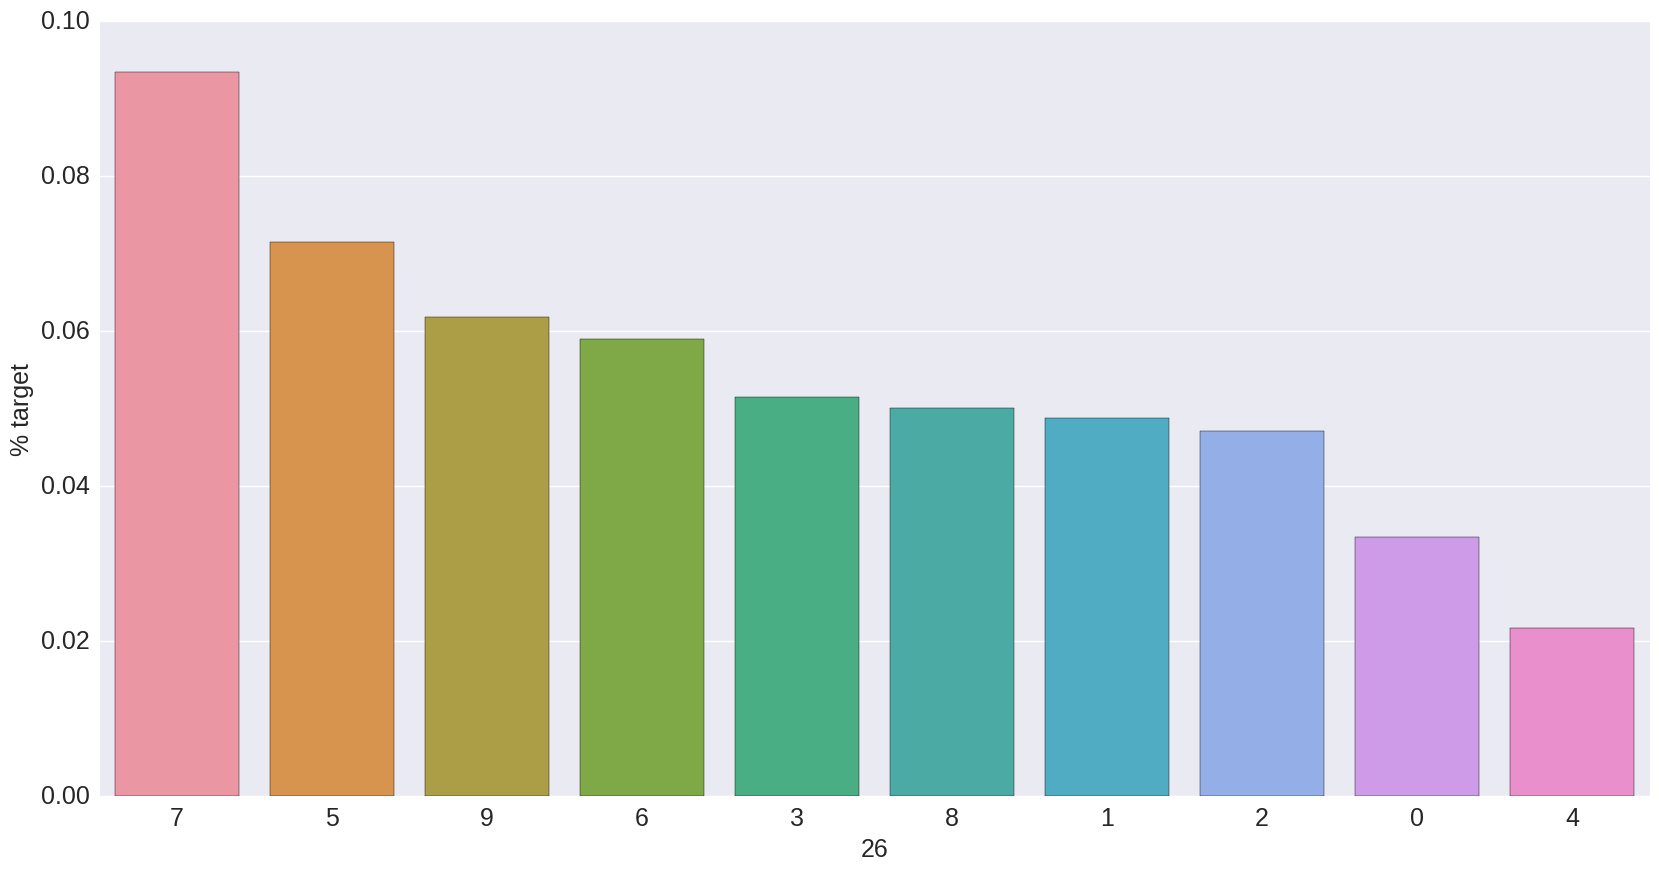

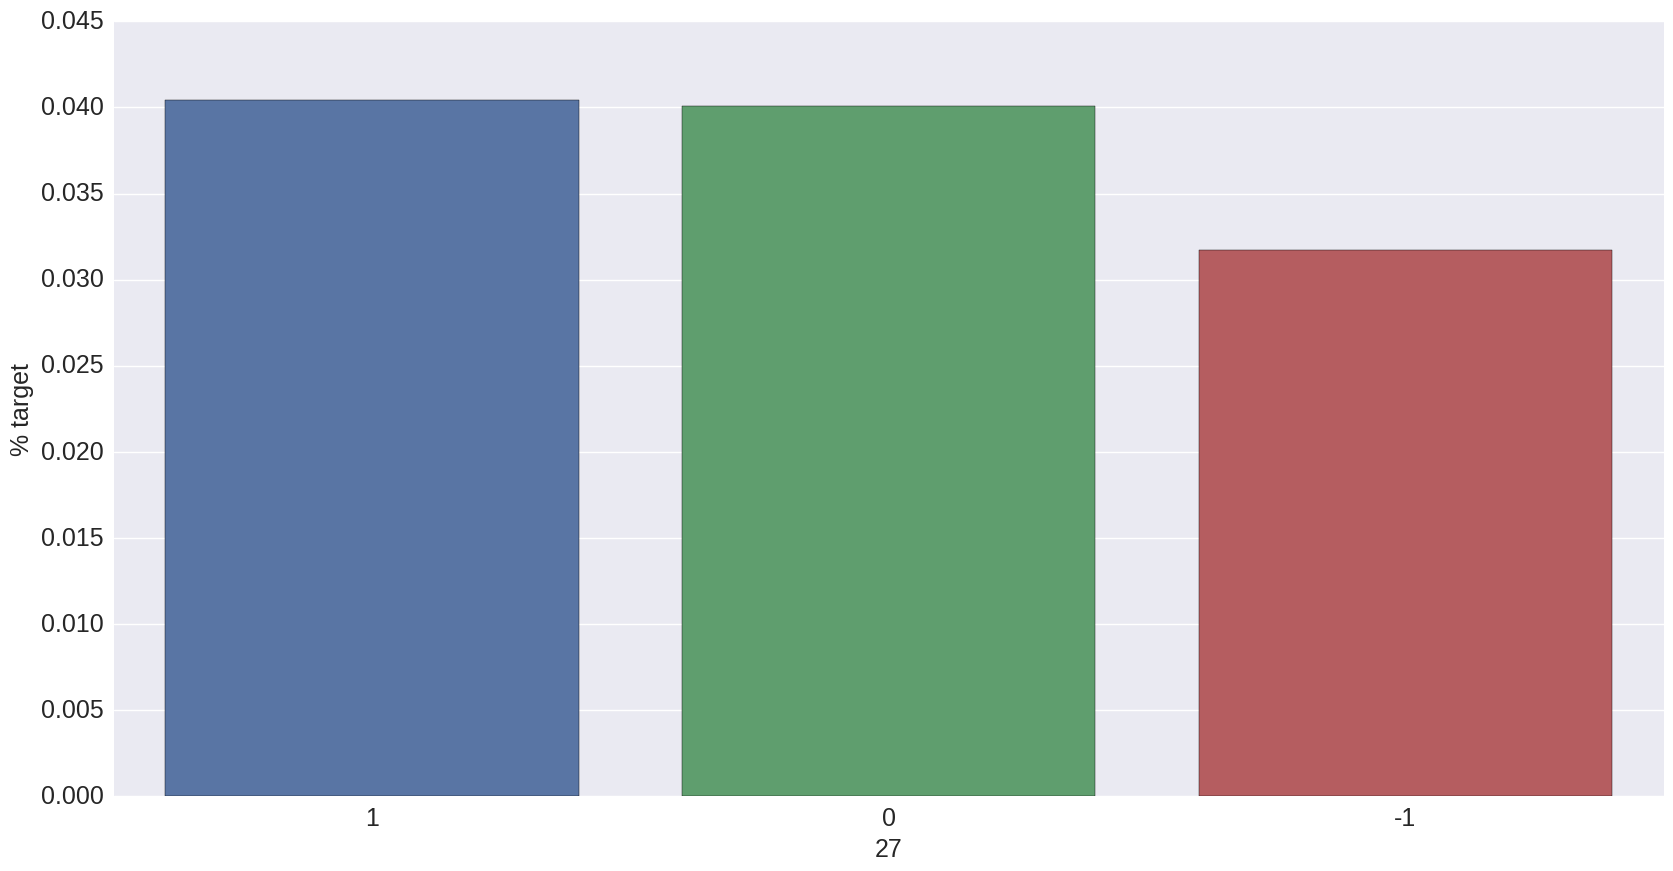

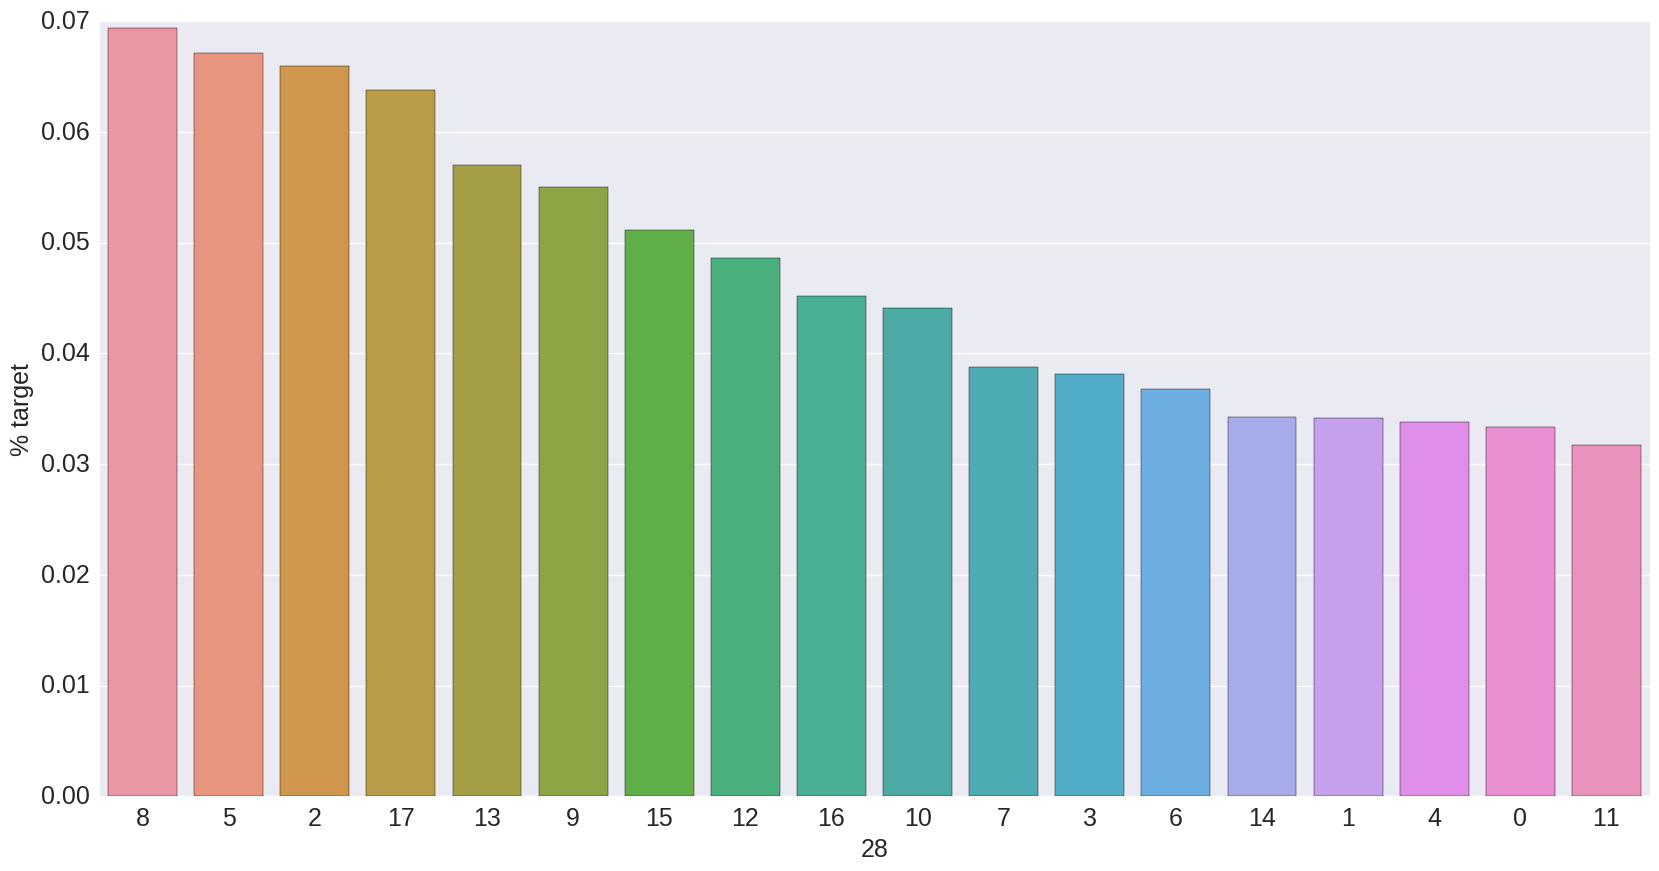

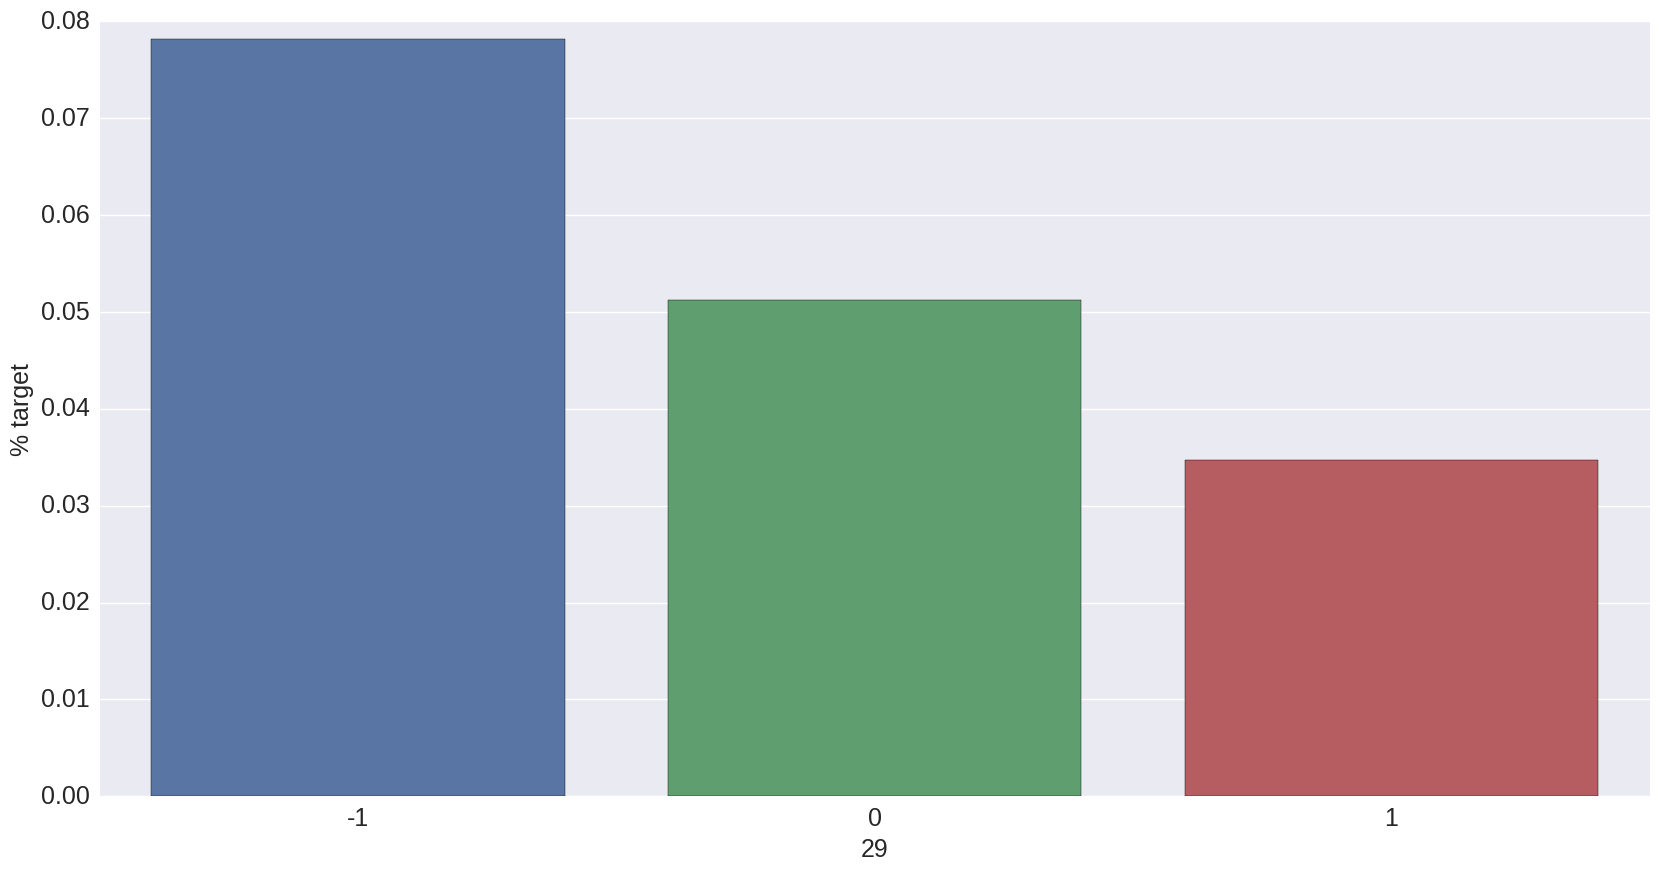

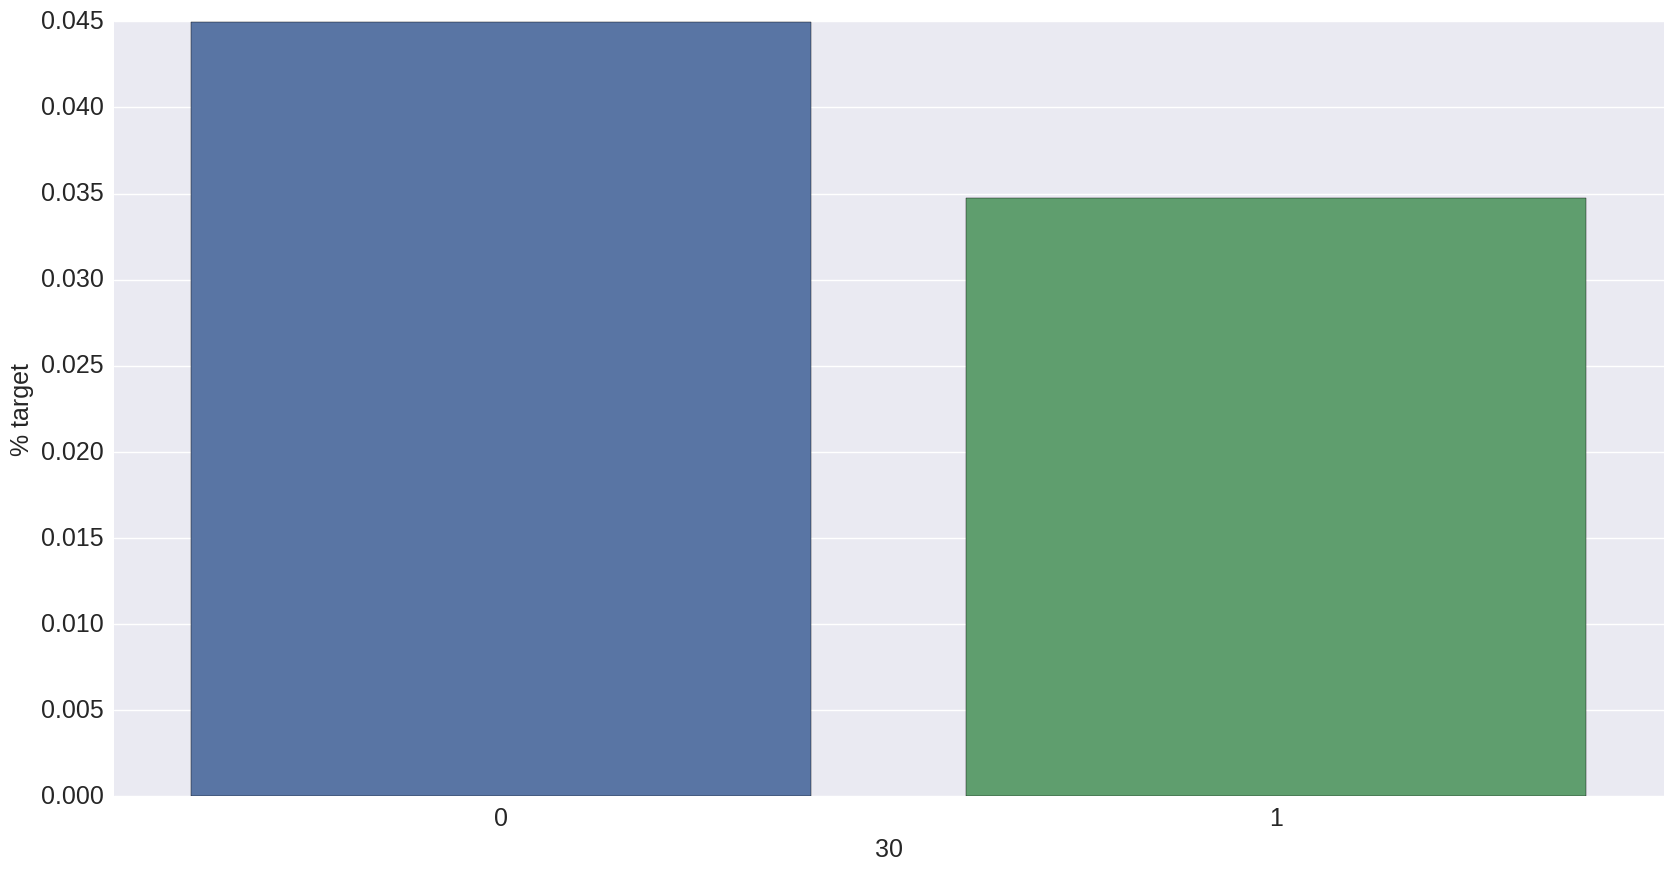

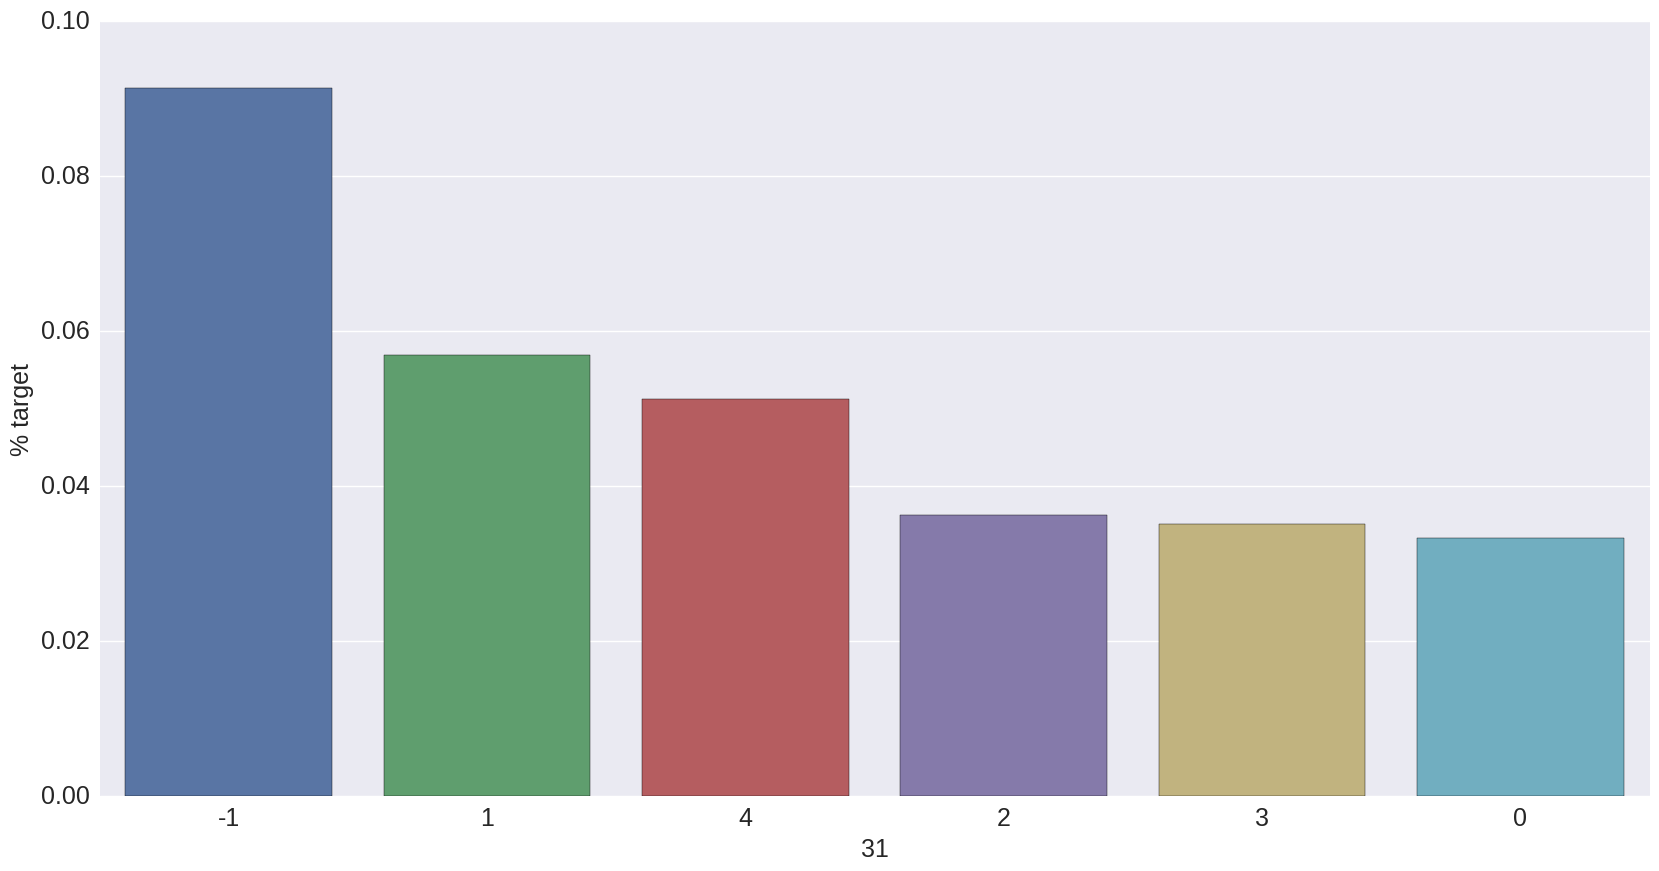

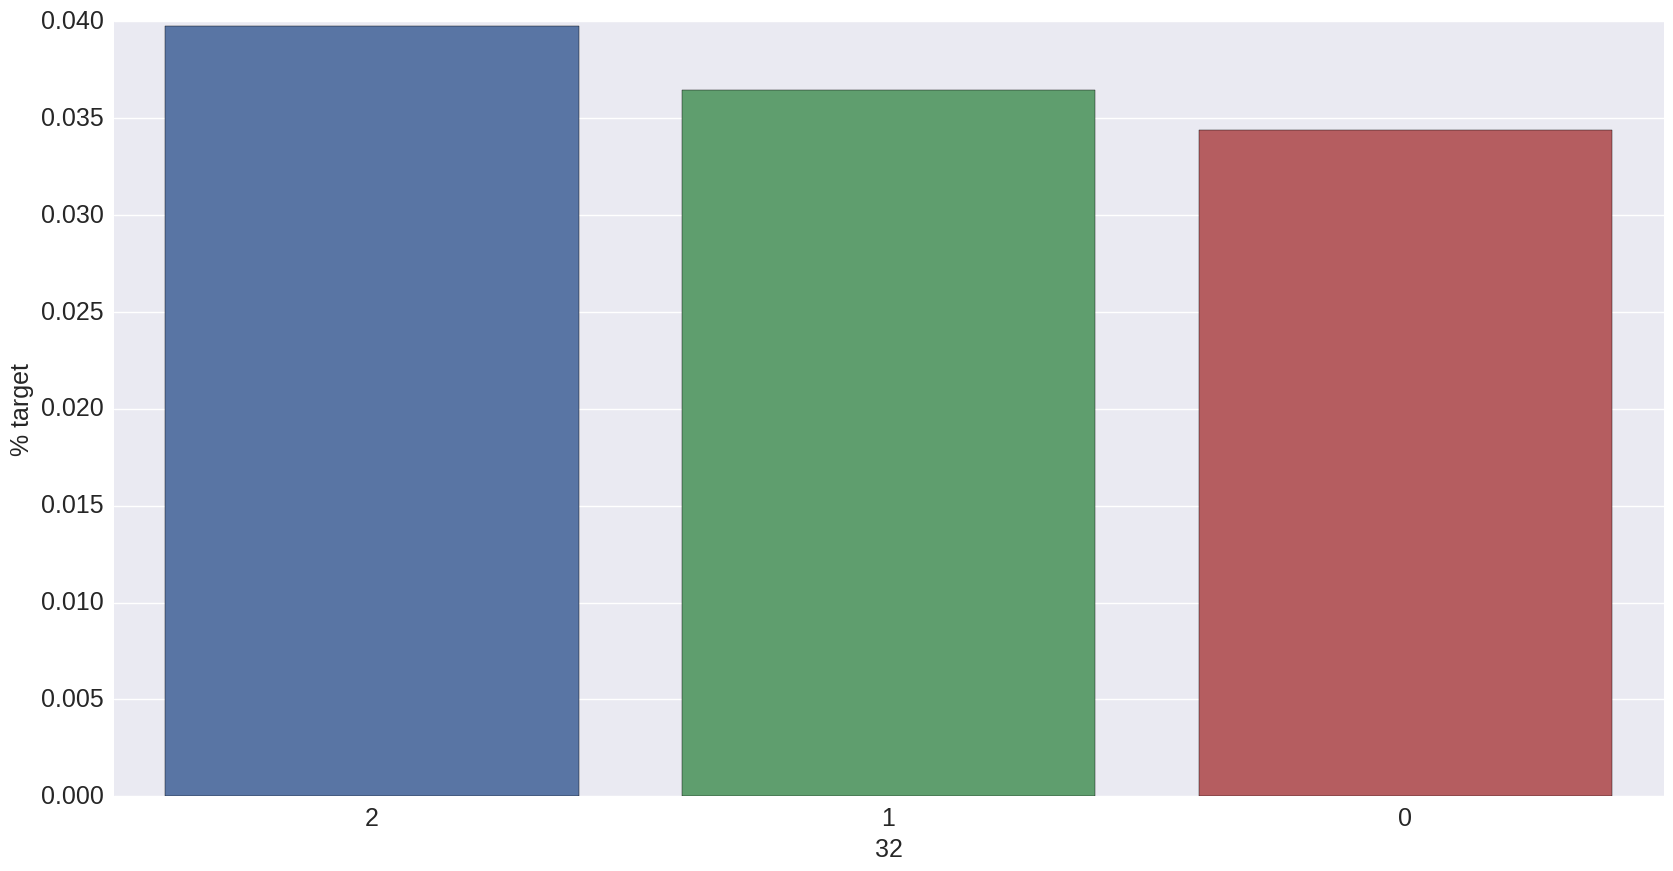

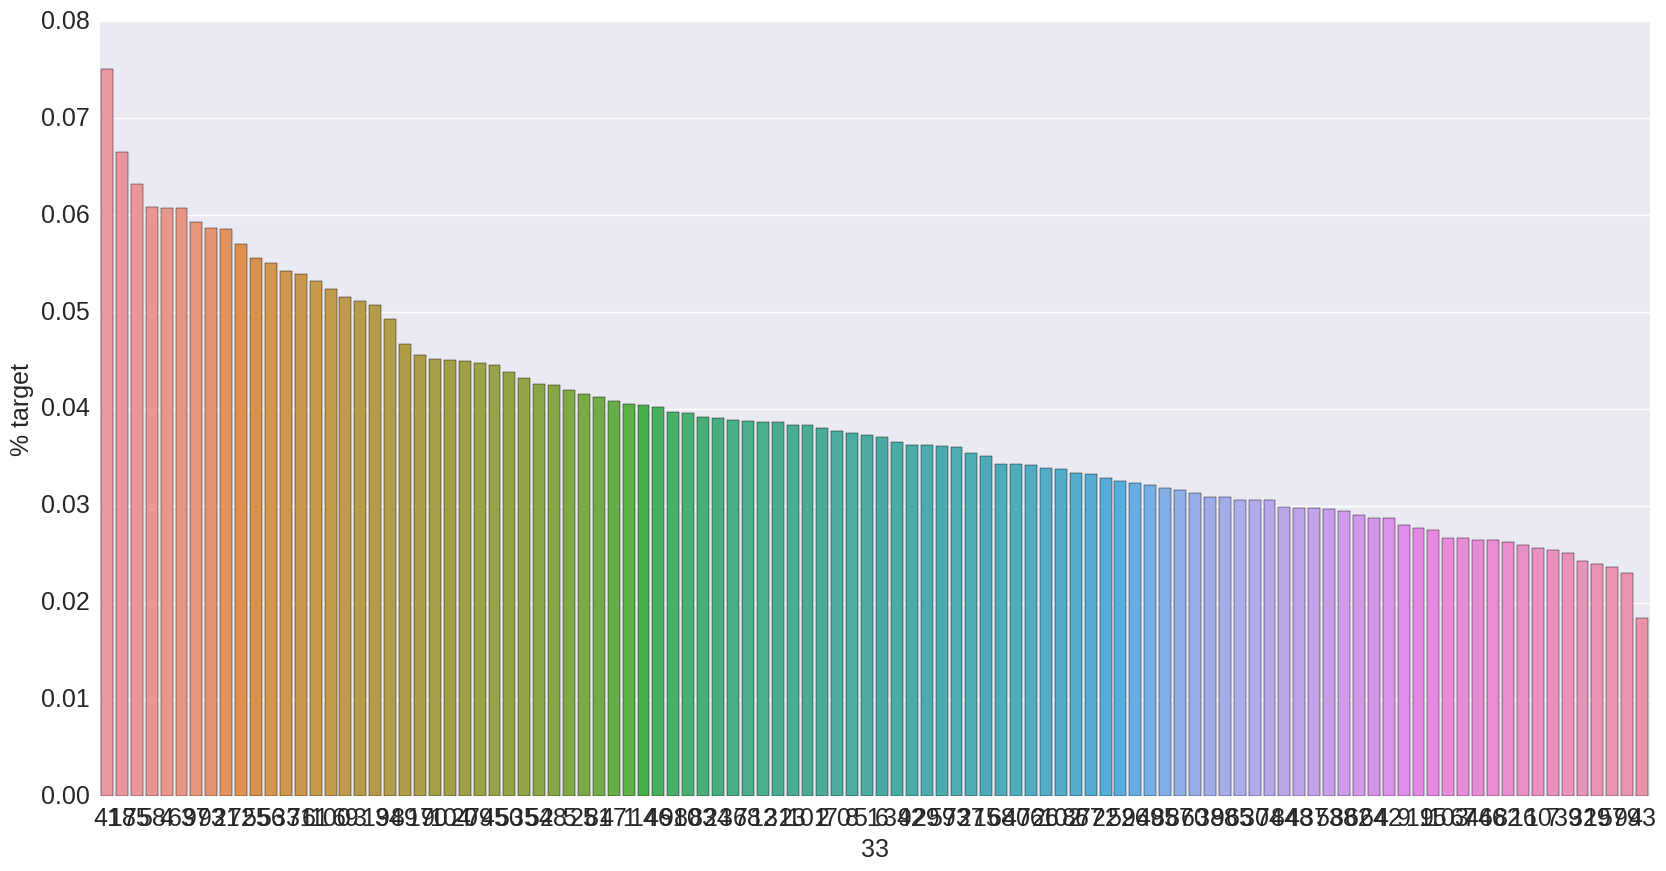

In [25]:
#Checking the distribution of minority class in different categories of categorical variables

v = list(MetaData[(MetaData.level == 'categorical') & (MetaData.keep)].index)
v.remove(0)
for f in v:
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 1]].groupby(list(train[[f]]), as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    x1 = cat_perc.columns[0]
    y1 = cat_perc.columns[1]
    sns.barplot(ax = ax, x = x1, y = y1, data=cat_perc, order=cat_perc[x1])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)


In [26]:
#Findings:

#We can see in some variables, target data is distributed equally like - varaible - 25, 27
#We can't remove the missing value rows from data as they contains majority of target variable distribution in some variables
#like - variable - 23, 5 